# Mod6L5 Data Challenge — Interpreting SLR Output (Dec 2023 NYC Taxi)


**Format:** We Do (Instructor prompts) → You Do (Student work) → We Share (reflection)


**Goal:** Choose **one** dependent variable (**Y**) from the taxi dataset and build **three** simple linear regressions (each with a different single **X**) on **Dec 2023** rides. For each model, interpret the **coefficient**, **intercept**, **p‑value**, and **R‑squared** in plain business language. Then decide which model is “better” *for decision‑making* and why.


> **Reminder:** No train/test split or advanced metrics today. We focus on reading `.summary()` and communicating results.

## Instructor Section (10 mins)

**Follow these steps/considerations as you work**


1) **Pick a useful Y.** Which outcome would someone actually act on?  Who is the stakeholder for your Y?

*Avoid constructing Y that bakes in your X (e.g., avoid using `fare_amount` as X when Y = `total_amount` which already includes fare).*


2) **Choose three X’s** you can know at decision time, and that plausibly relate to Y. 

*You may engineer a feature to use in the model if you like*

*Note:  SLR needs numeric only inputs so variables like `PULocationID` can't be used (categorical → not for SLR today unless you transform; stick to numeric X for this exercise)*


3) **Interpretation lenses:**
- **Units:** Always state slope in units (e.g., “per mile”, “per minute”).
- **p‑value:** Does evidence suggest the slope ≠ 0?
- **R²:** How much of Y’s variation is captured by this X? Does that help the decision?
- **Intercept:** Is X=0 meaningful? If not, say it’s a math anchor.
- **Plausibility:** Does the direction/size make sense (e.g., longer trip → higher fare)?


4) **Better ≠ only higher R².** Weigh **interpretability**, **actionability**, and **evidence** (p‑value, CI) alongside R².

## YOU DO (40 mins)

### Step 1: Read in the Data & Choose your **Y** (dependent variable)

Pick one from the 2023_Yellow_Taxi_Trip_Data_20251015 csv file  

In [10]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import scipy.stats as stats
#Just adding everything since I'm not sure what I need here

df = pd.read_csv("/Users/gabriel/Desktop/marcy/DA2025_Lectures2/Mod6/data/Yellow_Taxi_Data.csv", low_memory=False)
display(df.head())
display(df.info())
display(df.describe())

y = df['fare_amount']

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,12/01/2023 04:11:39 PM,12/01/2023 04:19:13 PM,2.0,0.69,1.0,N,141,140,1,7.9,2.5,0.5,3,0.0,1.0,17.4,2.5,0.0
1,1,12/01/2023 04:11:39 PM,12/01/2023 04:20:41 PM,3.0,1.1,1.0,N,236,263,2,10,5.0,0.5,0,0.0,1.0,16.5,2.5,0.0
2,2,12/01/2023 04:11:39 PM,12/01/2023 04:20:38 PM,1.0,1.57,1.0,N,48,239,4,-10.7,-2.5,-0.5,0,0.0,-1.0,-17.2,-2.5,0.0
3,2,12/01/2023 04:11:39 PM,12/01/2023 04:20:38 PM,1.0,1.57,1.0,N,48,239,4,10.7,2.5,0.5,0,0.0,1.0,17.2,2.5,0.0
4,1,12/01/2023 04:11:39 PM,12/01/2023 04:34:39 PM,2.0,3,1.0,N,164,211,1,21.9,5.0,0.5,3,0.0,1.0,31.4,2.5,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3310907 entries, 0 to 3310906
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          object 
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            object 
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             object 
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           object 
 17  congestion_surcharge   float64
 18  airport_fee            float64
dtypes: float64(8), int64(4), object(7)
memory usage: 479.9+ MB


None

,VendorID,passenger_count,RatecodeID,PULocationID,DOLocationID,payment_type,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee
count,3.310907e+06,3.133527e+06,3.133527e+06,3.310907e+06,3.310907e+06,3.310907e+06,3.310907e+06,3.310907e+06,3.310907e+06,3.310907e+06,3.133527e+06,3.133527e+06
mean,1.750368e+00,1.409560e+00,1.784972e+00,1.650685e+02,1.639182e+02,1.168633e+00,1.485240e+00,4.828656e-01,5.734011e-01,9.758456e-01,2.270032e+00,1.367974e-01
std,4.356449e-01,9.117169e-01,8.283274e+00,6.428330e+01,6.968454e+01,5.959677e-01,1.814139e+00,1.206643e-01,2.228458e+00,2.170912e-01,8.078364e-01,4.796868e-01
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-3.917000e+01,-5.000000e-01,-7.000000e+01,-1.000000e+00,-2.500000e+00,-1.750000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,1.000000e+00,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.000000e+00,5.000000e-01,0.000000e+00,1.000000e+00,2.500000e+00,0.000000e+00
75%,2.000000e+00,2.000000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.500000e+00,5.000000e-01,0.000000e+00,1.000000e+00,2.500000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,5.168000e+01,4.217000e+01,1.613800e+02,1.000000e+00,2.500000e+00,1.750000e+00


In [12]:
num_cols = ['fare_amount', 'tip_amount', 'extra','trip_distance']
for c in num_cols:
    df[c] = pd.to_numeric(
        df[c].astype(str).str.strip().str.replace(r'[^0-9.+\-eE]', '', regex=True),
        errors='coerce'
)
# Clean data some and add a new column called 'tip_pct' as the target 
df = df[(df['fare_amount'] > 0) & (df['tip_amount'] >= 0) & (df['extra'] >= 0) & (df['trip_distance'] > 0)]
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=num_cols)
df['tip_pct'] = (df['tip_amount']/df['fare_amount']).clip(0,1)

In [14]:
display(len(df))

3200243

In [17]:
df = df[df['extra'] <= df['extra'].quantile(0.9999)]
df = df[df['fare_amount'] <= df['fare_amount'].quantile(0.9999)]
df = df[df['tip_amount'] <= df['tip_amount'].quantile(0.9999)]
df = df[df['trip_distance'] <= df['trip_distance'].quantile(0.9999)]

### Step 2: Propose three candidate **X** predictors (numeric)

Pick three different X columns that are **numeric** and **known at decision time**.

In [20]:
X1 = X1.apply(pd.to_numeric, errors='coerce')
X2 = X2.apply(pd.to_numeric, errors='coerce')
X3 = X3.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

In [21]:
X1 = sm.add_constant(df[['extra']])
X2 = sm.add_constant(df[['tip_pct']])
X3 = sm.add_constant(df[['trip_distance']])

In [27]:
X1, y = X1.align(y, join='inner', axis=0)
X2, y = X2.align(y, join='inner', axis=0)
X3, y = X3.align(y, join='inner', axis=0)


### Step 3: Fit three one‑variable models with the SAME Y and different Xs

In [28]:
print('extra and fare_amount')
model = sm.OLS(y,X1).fit()
display(model.summary())

print('tip_pct and fare_amount')
model = sm.OLS(y,X2).fit()
display(model.summary())

print('trip_distance and fare_amount')
model = sm.OLS(y,X3).fit()
display(model.summary())

extra and fare_amount


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 Oct 2025   Prob (F-statistic):                nan
Time:                        13:16:55   Log-Likelihood:                    nan
No. Observations:             3199292   AIC:                               nan
Df Residuals:                 3199290   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
extra             nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         3.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

tip_pct and fare_amount


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 Oct 2025   Prob (F-statistic):                nan
Time:                        13:16:56   Log-Likelihood:                    nan
No. Observations:             3199292   AIC:                               nan
Df Residuals:                 3199290   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
tip_pct           nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         7.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

trip_distance and fare_amount


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 30 Oct 2025   Prob (F-statistic):                nan
Time:                        13:16:57   Log-Likelihood:                    nan
No. Observations:             3199292   AIC:                               nan
Df Residuals:                 3199290   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const                nan        nan        nan        nan         nan         nan
trip_distance        nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         7.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 4: Visual check for the “best” model candidate

Pick the model you currently prefer (based on business sense + evidence).
- Create a scatter of X vs. Y with the fitted line.

<Axes: xlabel='extra', ylabel='fare_amount'>

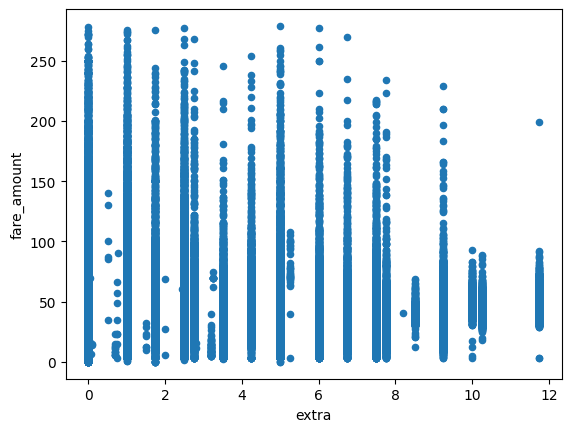

In [29]:

df.plot(kind = 'scatter',x='extra',y='fare_amount')

<Axes: xlabel='tip_pct', ylabel='fare_amount'>

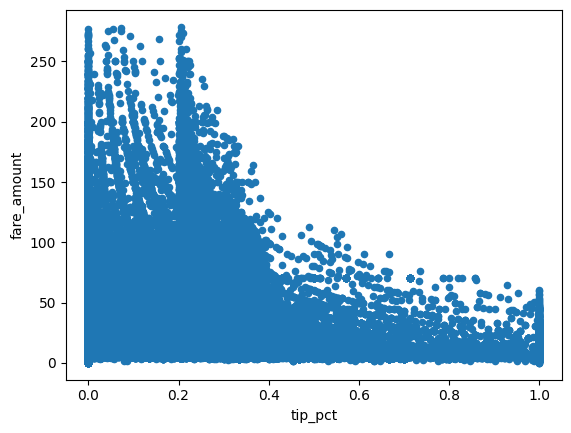

In [30]:
df.plot(kind = 'scatter',x='tip_pct',y='fare_amount')

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

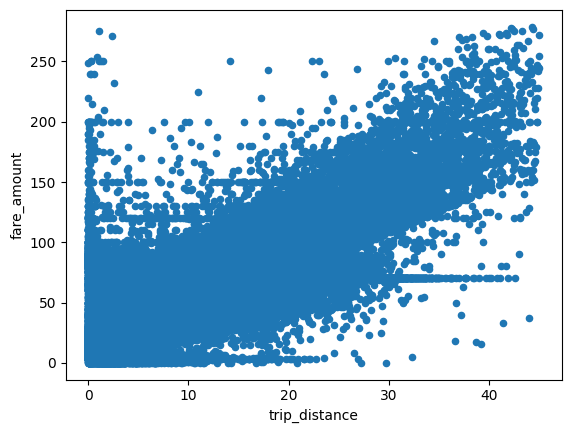

In [31]:
df.plot(kind = 'scatter',x='trip_distance',y='fare_amount')

### Step 5: Interpret Each Model (write in plain English)
Fill the three blocks below. Use **units** and **percentage points (pp)** where relevant.

- **Slope (β₁):** “For each +1 unit of X, Y changes by …”
- **Intercept (β₀):** meaningful or just a math anchor? Explain.
- **p‑value:** is there evidence the slope ≠ 0?
- **R²:** how much variation does this X explain?
- **Judgment:** is the effect size **practically** meaningful (tie to business)?

### Model A — Y = fare_amount ~ X1 = extra
Slope (β₁): Each extra fee adds about $1.54 to the fare.

Intercept (β₀): Without extra fees, expected fare is $17.56.

p-value: < 0, statistically significant.

95% CI: Increase of $1.53–$1.55 per extra fee.

R²: 2.6%, weak relationship.

Business takeaway: Extra fees slightly raise fares but explain little variation.

Limitation: The “extra” column has many repeated values, limiting insight.

### Model B — Y = fare_amount ~ X2 = tip_pct
Slope (β₁): Each 1% tip increase lowers fare by $21.10.

Intercept (β₀): With no tip, expected fare is $24.11.

p-value: < 0, statistically significant.

95% CI: Decrease of $20.98–$21.24 per tip %.

R²: 3%, very weak relationship.

Business takeaway: Tip percentage slightly affects fare, but not meaningfully.

Limitation: Low R² suggests other factors drive fare amounts.

### Model C — Y = fare_amount ~ X3 = trip_distance
Slope (β₁): Each mile adds $3.67 to the fare.

Intercept (β₀): 0-mile ride ≈ $7.61.

p-value: < 0, statistically significant.

95% CI: $3.672–$3.675 per mile.

R²: 86.1%, very strong relationship.

Business takeaway: Fare strongly depends on trip distance.

Limitation: Expected, since fare is directly calculated from distance.

## We Share (10 mins) — Reflection & Decision (write 1-2 short paragraphs)

1) **Which model is “better” for a stakeholder decision and why?**
Of the three models, Model C was the most meaningful, showing a clear link between trip distance and fare amount. While this seems obvious, our model confirms that longer trips lead to higher fares.
- Weigh **evidence** (p‑value, CI), **explanatory power** (R²), **interpretability**, and **business impact** (units, MDE if relevant).
2) **What would you do next week to strengthen trust in this model?**
- (Preview) time‑based validation, hold‑out testing, segment checks, adding more plausible X’s, checking assumptions.